In [1]:
# Dependencies and Twitter API Keys and Authorizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create array with news outlet twitter handles
    
newsOutlets = ["BBCWorld", "CBSNews","CNN", "FoxNews", "nytimes"]

In [25]:
# print a single tweet json for reference
test_tweet = api.user_timeline(newsOutlets[0])
print(json.dumps(test_tweet[0], sort_keys=True, indent=4))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Dec 03 02:20:07 +0000 2017",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "bbc.in/2AFAE4I",
                "expanded_url": "http://bbc.in/2AFAE4I",
                "indices": [
                    73,
                    96
                ],
                "url": "https://t.co/Hmo8jR1cNF"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 97,
    "favorited": false,
    "geo": null,
    "id": 937144383648030721,
    "id_str": "937144383648030721",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "possibly_sensitive": false,
    "retweet_count": 67,
    "retweeted": false,
    "source": "<a href=\"

In [4]:
# Create array for sentiments
sentiment_array = []

In [5]:
# Loop through all five media outlets
for outlet in newsOutlets:
    counter = 1   
    
    # For each outlet loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get user's tweets, specifying the page
        public_tweets = api.user_timeline(outlet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #Get info for each tweet 
                      
            # Get account handle and full user name
            tweet_target = tweet["user"]["screen_name"]
            tweet_name = tweet["user"]["name"]
            
            # Convert tweet date
            converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            
            # Get tweet text
            tweet_text = tweet["text"]
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(tweet["text"])
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            comp = results["compound"]
            
            # Place data in a dictionary
            sentiment = {"TweetsAgo":counter,
                         "Target": tweet_target,
                         "User": tweet_name,
                         "Date": converted_time,
                         "Text": tweet_text,
                         "Compound": comp,
                         "Positive": pos,
                         "Neutral": neu,
                         "Negative": neg
                        }
            
            # Append dictionary to master sentiment array
            sentiment_array.append(sentiment)
           
        # For testing only print sample tweet info           
        # print(f"Tweet# {counter}: {outlet}")
        # print(f"      name: {tweet_name} |  time: {converted_time} | {tweet_text} ")
            
        # Increment counter
            counter +=1

In [6]:
# Verify there are 500 total tweets (100 from each of the five outlets)
len(sentiment_array)

500

In [7]:
# Create sentiments data frame
sentiments_df = pd.DataFrame(sentiment_array)

In [8]:
sentiments_df = sentiments_df[["TweetsAgo","Target","User","Date","Positive","Neutral","Negative","Compound","Text"]]
sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
0,1,BBCWorld,BBC News (World),2017-12-03 02:20:07+00:00,0.245,0.755,0.000,0.5984,Meet one of the nominees in Liberia's hunt for...
1,2,BBCWorld,BBC News (World),2017-12-03 02:16:44+00:00,0.388,0.393,0.219,0.4588,From war wounded to medal winner: Ukrainian so...
2,3,BBCWorld,BBC News (World),2017-12-03 02:02:43+00:00,0.000,0.778,0.222,-0.2500,UK social mobility board quits in protest http...
3,4,BBCWorld,BBC News (World),2017-12-03 01:04:37+00:00,0.535,0.465,0.000,0.3182,Fresh heart https://t.co/InPKv8ZCQf
4,5,BBCWorld,BBC News (World),2017-12-03 00:27:24+00:00,0.000,1.000,0.000,0.0000,Pop apocalypse https://t.co/eE4noHWNK7


In [9]:
# Sort data frame by target and tweets ago
sentiments_df = sentiments_df.sort_values(["Target","TweetsAgo"], ascending=[True, False])
    #sentiments_df.head()

In [10]:
# Save twitter data to CSV file
sentiments_df.to_csv("recentTweets.csv", encoding="utf-8", index=False)

In [11]:
# Create charting data frames for each type
BBC_df = sentiments_df[sentiments_df["Target"]=="BBCWorld"]
CBS_df = sentiments_df[sentiments_df["Target"]=="CBSNews"]
CNN_df = sentiments_df[sentiments_df["Target"]=="CNN"]
FOX_df = sentiments_df[sentiments_df["Target"]=="FoxNews"]
NYT_df = sentiments_df[sentiments_df["Target"]=="nytimes"]

In [12]:
plt.scatter(BBC_df["TweetsAgo"], BBC_df["Compound"], marker="o", facecolors="gold", edgecolors="black", label="BBCWorld", alpha=0.75)
plt.scatter(CBS_df["TweetsAgo"], CBS_df["Compound"], marker="o", facecolors="blue", edgecolors="black", label="CBSNews", alpha=0.75)
plt.scatter(CNN_df["TweetsAgo"], CNN_df["Compound"], marker="o", facecolors="green", edgecolors="black", label="CNN", alpha=0.75)
plt.scatter(FOX_df["TweetsAgo"], FOX_df["Compound"], marker="o", facecolors="red", edgecolors="black", label="FoxNews", alpha=0.75)
plt.scatter(NYT_df["TweetsAgo"], NYT_df["Compound"], marker="o", facecolors="lightblue", edgecolors="black", label="NYTimes", alpha=0.75)

In [13]:
# Add labels to the x and y axes
curDate = datetime.now().date()
plt.title(f"Sentiment Analysis of Media Tweets as of {curDate}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

Text(0,0.5,'Tweet Polarity')

In [14]:
# Set the x and y limits
plt.xlim(100, 0)
plt.ylim(-1, 1)

(-1, 1)

In [15]:
# Set a grid on plot and format legend
plt.grid()
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
lgnd= plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", scatterpoints=1, fontsize=10, title="Media Outlets")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

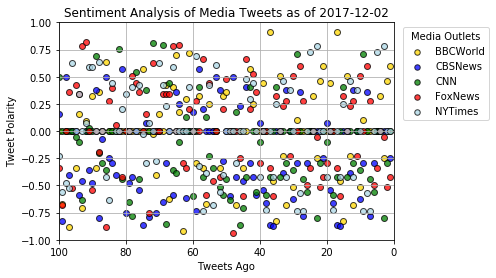

In [16]:
# Save and show plot
plt.savefig("SentimentScatterPlot.png")
plt.show()

In [17]:
# Group the data by media outlet
groupedNews = sentiments_df.groupby(["Target"], as_index=False)
    #groupedNews.head()

In [18]:
# Get the average Compound sentiment
avgComp = groupedNews["Compound"].mean()
avgComp.head()

,Target,Compound
0,BBCWorld,0.002582
1,CBSNews,-0.192215
2,CNN,-0.121514
3,FoxNews,0.017722
4,nytimes,0.002401


In [19]:
# Set up arrays for charting
bar_outlets = avgComp["Target"]
bar_Compound = avgComp["Compound"]
x_axis = np.arange(0, len(bar_Compound), 1)

In [20]:
# Create a bar chart based upon the above data
plt.bar(x_axis, bar_Compound, color=["gold","blue","green","red","lightblue"], align="edge")

<Container object of 5 artists>

In [21]:
# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_outlets)

([<matplotlib.axis.XTick at 0x23bf3f8f588>,
 <a list of 5 Text xticklabel objects>)

In [22]:
# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(-.3, .1)

(-0.3, 0.1)

In [23]:
# Give the chart a title, x label, and y label
plt.title(f"Overall Media Sentiment Based on Twitter as of {curDate}")
plt.xlabel("Outlets")
plt.ylabel("Tweet Polarity")

Text(0,0.5,'Tweet Polarity')

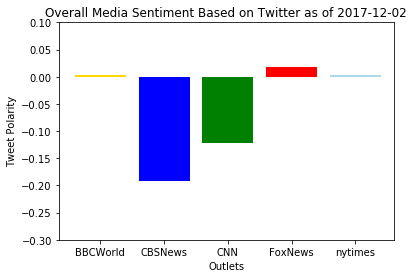

In [24]:
# Save an image of the chart and print it to the screen
plt.savefig("BarSentiment.png")
plt.show()